In [1]:
#Ejercicio: separar dos nubes e puntos mediante una circunferencia, en la que una nube se encuentra contenida dentro de otra

import numpy as np 
import scipy as sc

import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

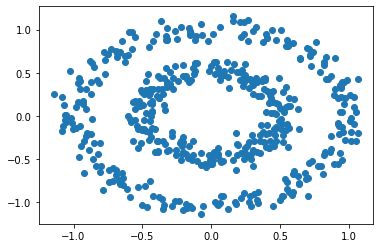

In [5]:
#CREAR EL DATASET

n = 500 #número de datos en el registro

p = 2 #número de características que tienen los datos en el registro

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.07) #factor es la distancia entre las dos nubes de puntos. El ruido dispersa los puntos
#En este dataset, la primera caracteristica (la X) es la coordenada de cada uno de los puntos. La segunda característica es un vector binario que indica a cual de las dos nubes de puntos pertenece cada punto

#pintemos las dos nubes de puntos
plt.scatter(X[:,0], X[:,1])
plt.show()

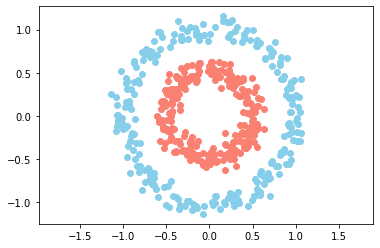

In [7]:
#vamos a pintar de color distinto cuando un punto pertenezca a un conjunto o a otro

plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue") #cuando pertenezca al conjunto 0
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon") #cuando pertenezca al conjunto 1

plt.axis("equal") #para tener una gráfica proporcionada en ambos ejes
plt.show()